In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"C:\Users\ABHINANDAN\Desktop\data science\New folder\DSData-master\Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#Lets check  number of null values in each column
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [4]:
#lets look at the info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
#  Lets remove unwanted column
df = df.drop(columns = "Unnamed: 0", axis = 1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Visualization

<AxesSubplot:xlabel='TV', ylabel='sales'>

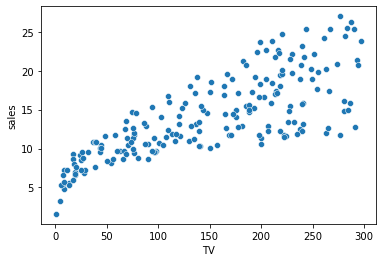

In [6]:
#Lets visualize the relation between TV and sales
sns.scatterplot(x= "TV", y = "sales", data = df)
#From below graph we can clearly understand that TV advertising is linearly related with sales
#That is if we investment  more in TV advertising it will give more sales

<AxesSubplot:xlabel='radio', ylabel='sales'>

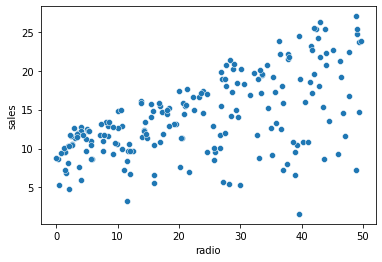

In [7]:
#Now lets visualize the relation between radio and sales
sns.scatterplot(x= "radio", y = "sales", data = df)
#Radio advertising is also linearly related to sales, but some times it will give less sales at higher investment as well.
#that means the relation is not that strong as compare to TV advertising

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

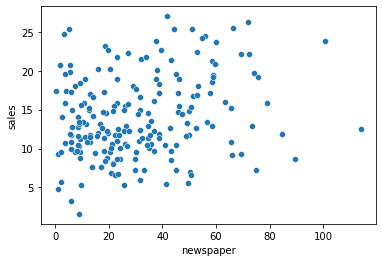

In [8]:
#lets visualize the relation between newspaper and sales
sns.scatterplot(x = "newspaper", y = "sales", data = df)
# It looks like the Newspaper advertising is not in good relationship with sales
# At lower investment it is giving less sales as well as higher sales and at the same time at higher investment sales may go down.
# So it is better to not invest much in Newspaper advertising

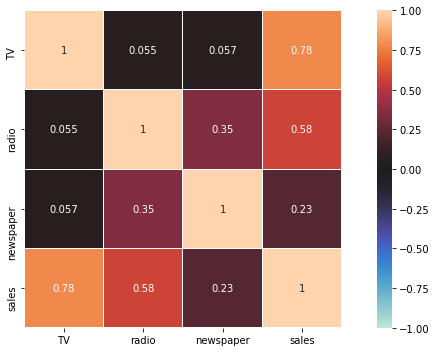

In [9]:
#Lets check the correlation among features
df_corr = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

We can say that investment in TV advertising will give more sales as compared to radio and newspaper.

But at the same time the cost involved in TV advertising will be much Higher compared to radio and newspaper.

In [10]:
#describe the data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Greate our data looks good.

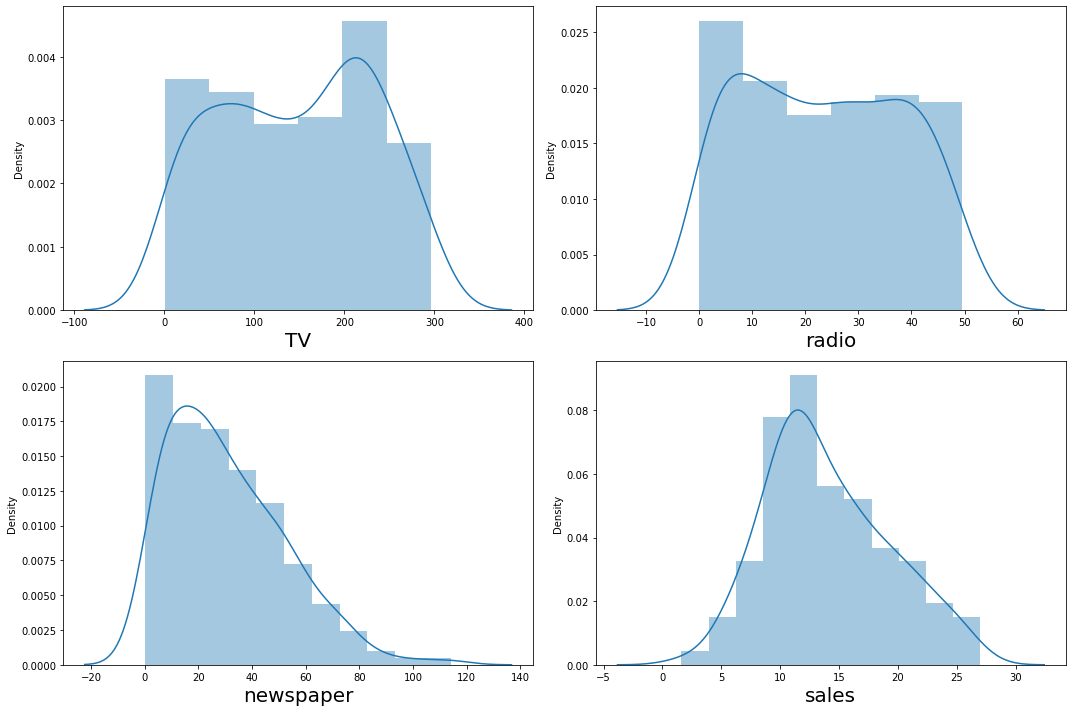

In [11]:
#Lets see how the data is distributed
plt.figure(figsize = (15,10))
plotnumber = 1
for column in df:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

It seems there is little skewness in newspaper column, but the data set is too small and we don't want to loose data here, so we are not removing outliers

In [12]:
#lets saperate our data into features and label
x = df.drop(columns = ["sales"], axis = 1)
y = df["sales"]

In [13]:
#Data scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Find best random_state

In [14]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(150,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.9321761637487651 on Random State 152


In [15]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25,random_state = 151)

In [16]:
#Model with LinearRegression
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("Training accuracy :", reg.score(x_train,y_train))
print("Testing accuracy :", reg.score(x_test,y_test))
#evaluation
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test,y_pred)
print("R2 Score :", r2)

Training accuracy : 0.8851914810921924
Testing accuracy : 0.9321761637487651
RMSE : 1.36455868613339
R2 Score : 0.9321761637487651


In [17]:
#Model with DecesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print("Training accuracy :", dt.score(x_train,y_train))
print("Testing accuracy :", dt.score(x_test,y_test))
#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test,pred_dt)
print("R2 Score :", r2)

Training accuracy : 1.0
Testing accuracy : 0.9461859089984562
RMSE : 1.2154834429147934
R2 Score : 0.9461859089984562


In [18]:
#Model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Training accuracy :", rf.score(x_train,y_train))
print("Testing accuracy :", rf.score(x_test,y_test))
# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

Training accuracy : 0.9966868938994302
Testing accuracy : 0.9677818213421716
RMSE : 0.9404842688742857
R2 Score : 0.9677818213421716


In [19]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
pred_knr = knr.predict(x_test)
print("Training accuracy :", knr.score(x_train,y_train))
print("Testing accuracy :", knr.score(x_test,y_test))
# evaluation
mse = mean_squared_error(y_test, pred_knr)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, pred_knr)
print("R2 Score :", r2)

Training accuracy : 0.9560522129983794
Testing accuracy : 0.9378443242197357
RMSE : 1.30629552552246
R2 Score : 0.9378443242197357


In [20]:
#Lets use SVM regressor
from sklearn.svm import SVR
svr =  KNeighborsRegressor()
svr.fit(x_train, y_train)
pred_svr = knr.predict(x_test)
print("Training accuracy :", svr.score(x_train,y_train))
print("Testing accuracy :", svr.score(x_test,y_test))
# evaluation
mse = mean_squared_error(y_test, pred_svr)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, pred_svr)
print("R2 Score :", r2)

Training accuracy : 0.9560522129983794
Testing accuracy : 0.9378443242197357
RMSE : 1.30629552552246
R2 Score : 0.9378443242197357


In [21]:
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
#for LinearRegression model
reg = LinearRegression()
c_scores = cross_val_score(reg,x_scaled,y,cv=5)
print("Cross validation score of LinearRegression model is :", c_scores.mean())

Cross validation score of LinearRegression model is : 0.8871063495438435


In [22]:
#for DecesionTreeRegressor model
dt =DecisionTreeRegressor()
c_scores = cross_val_score(dt,x_scaled,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model is :", c_scores.mean())

Cross validation score of DecisionTreeRegressor model is : 0.9522483872263375


In [23]:
#for RandomForestRegressor model
c_scores = cross_val_score(rf,x_scaled,y,cv=5)
print("Cross validation score of RandomForestRegressor model is :", c_scores.mean())

Cross validation score of RandomForestRegressor model is : 0.974901605146347


In [24]:
#for KNeighborsRegressor model
c_scores = cross_val_score(knr,x_scaled,y,cv=5)
print("Cross validation score of KNeighborsRegressor model is :", c_scores.mean())

Cross validation score of KNeighborsRegressor model is : 0.940813583487013


In [25]:
#for SVR model
c_scores = cross_val_score(svr,x_scaled,y,cv=5)
print("Cross validation score of SVR model is :", c_scores.mean())

Cross validation score of SVR model is : 0.940813583487013


Here four algorithms giving the CV score more than accuracy,

DecisionTreeRegressor is giving least difference in CV score and accuracy, hence we are selecting this algorithm as a best fit model

### Hyperparameter tuning

In [34]:
grid_params = {
                'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
                'min_samples_leaf':[1,2,3,5,6],
                'max_depth':[3,5,6,8,10,12],
                'min_samples_split':[1,2,3,5,6],
                }

In [35]:
GCV =  GridSearchCV(DecisionTreeRegressor(),  grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [3, 5, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 5, 6],
                         'min_samples_split': [1, 2, 3, 5, 6]})

In [36]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'mae',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [37]:
#Let's train and test our model using best parameters
model = DecisionTreeRegressor(criterion = 'mae',max_depth=7,min_samples_leaf=3,min_samples_split= 3)

model.fit(x_train,y_train)
pred = model.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f"r2 Score: {r2_score(y_test,pred)*100}%")
print("---------------------------------------------------")
print("RMSE :", rmse)

r2 Score: 94.14652468935421%
---------------------------------------------------
RMSE : 1.2676750372236572


## Saving model

In [30]:
import joblib
joblib.dump(model,"Advertising.pkl")

['Advertising.pkl']